In [66]:
import pathlib
import os
import shutil

In [67]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/train')

In [68]:
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')

In [69]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)

src:dogs-vs-cats-original\train\dog.0.jpg => dst:dogs-vs-cats\train\dog\dog.0.jpg
src:dogs-vs-cats-original\train\dog.100.jpg => dst:dogs-vs-cats\train\dog\dog.100.jpg
src:dogs-vs-cats-original\train\dog.200.jpg => dst:dogs-vs-cats\train\dog\dog.200.jpg
src:dogs-vs-cats-original\train\dog.300.jpg => dst:dogs-vs-cats\train\dog\dog.300.jpg
src:dogs-vs-cats-original\train\dog.400.jpg => dst:dogs-vs-cats\train\dog\dog.400.jpg
src:dogs-vs-cats-original\train\dog.500.jpg => dst:dogs-vs-cats\train\dog\dog.500.jpg
src:dogs-vs-cats-original\train\dog.600.jpg => dst:dogs-vs-cats\train\dog\dog.600.jpg
src:dogs-vs-cats-original\train\dog.700.jpg => dst:dogs-vs-cats\train\dog\dog.700.jpg
src:dogs-vs-cats-original\train\dog.800.jpg => dst:dogs-vs-cats\train\dog\dog.800.jpg
src:dogs-vs-cats-original\train\dog.900.jpg => dst:dogs-vs-cats\train\dog\dog.900.jpg
src:dogs-vs-cats-original\train\cat.0.jpg => dst:dogs-vs-cats\train\cat\cat.0.jpg
src:dogs-vs-cats-original\train\cat.100.jpg => dst:dogs-vs-cat

In [70]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

src:dogs-vs-cats-original\train\dog.1000.jpg => dst:dogs-vs-cats\validation\dog\dog.1000.jpg
src:dogs-vs-cats-original\train\dog.1100.jpg => dst:dogs-vs-cats\validation\dog\dog.1100.jpg
src:dogs-vs-cats-original\train\dog.1200.jpg => dst:dogs-vs-cats\validation\dog\dog.1200.jpg
src:dogs-vs-cats-original\train\dog.1300.jpg => dst:dogs-vs-cats\validation\dog\dog.1300.jpg
src:dogs-vs-cats-original\train\dog.1400.jpg => dst:dogs-vs-cats\validation\dog\dog.1400.jpg
src:dogs-vs-cats-original\train\cat.1000.jpg => dst:dogs-vs-cats\validation\cat\cat.1000.jpg
src:dogs-vs-cats-original\train\cat.1100.jpg => dst:dogs-vs-cats\validation\cat\cat.1100.jpg
src:dogs-vs-cats-original\train\cat.1200.jpg => dst:dogs-vs-cats\validation\cat\cat.1200.jpg
src:dogs-vs-cats-original\train\cat.1300.jpg => dst:dogs-vs-cats\validation\cat\cat.1300.jpg
src:dogs-vs-cats-original\train\cat.1400.jpg => dst:dogs-vs-cats\validation\cat\cat.1400.jpg


In [71]:
make_dataset_for_image_dataset_from_directory('test', 1500, 2500)

src:dogs-vs-cats-original\train\dog.1500.jpg => dst:dogs-vs-cats\test\dog\dog.1500.jpg
src:dogs-vs-cats-original\train\dog.1600.jpg => dst:dogs-vs-cats\test\dog\dog.1600.jpg
src:dogs-vs-cats-original\train\dog.1700.jpg => dst:dogs-vs-cats\test\dog\dog.1700.jpg
src:dogs-vs-cats-original\train\dog.1800.jpg => dst:dogs-vs-cats\test\dog\dog.1800.jpg
src:dogs-vs-cats-original\train\dog.1900.jpg => dst:dogs-vs-cats\test\dog\dog.1900.jpg
src:dogs-vs-cats-original\train\dog.2000.jpg => dst:dogs-vs-cats\test\dog\dog.2000.jpg
src:dogs-vs-cats-original\train\dog.2100.jpg => dst:dogs-vs-cats\test\dog\dog.2100.jpg
src:dogs-vs-cats-original\train\dog.2200.jpg => dst:dogs-vs-cats\test\dog\dog.2200.jpg
src:dogs-vs-cats-original\train\dog.2300.jpg => dst:dogs-vs-cats\test\dog\dog.2300.jpg
src:dogs-vs-cats-original\train\dog.2400.jpg => dst:dogs-vs-cats\test\dog\dog.2400.jpg
src:dogs-vs-cats-original\train\cat.1500.jpg => dst:dogs-vs-cats\test\cat\cat.1500.jpg
src:dogs-vs-cats-original\train\cat.1600.jp

In [72]:
import tensorflow as tf

In [73]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 21198 files belonging to 2 classes.


In [74]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0]


In [75]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.


In [76]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2998 files belonging to 2 classes.


In [77]:
import tensorflow as tf
from tensorflow.keras import layers

In [78]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [79]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [80]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 89, 89, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 43, 43, 32)       0         
 ePooling2D)                                              

In [82]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [83]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
663/663 [==============================] - 129s 193ms/step - loss: 0.6289 - accuracy: 0.6481 - val_loss: 0.5647 - val_accuracy: 0.7020
Epoch 2/20
663/663 [==============================] - 139s 210ms/step - loss: 0.5425 - accuracy: 0.7285 - val_loss: 0.5147 - val_accuracy: 0.7320
Epoch 3/20
663/663 [==============================] - 142s 213ms/step - loss: 0.4961 - accuracy: 0.7624 - val_loss: 0.5606 - val_accuracy: 0.7120
Epoch 4/20
663/663 [==============================] - 143s 215ms/step - loss: 0.4655 - accuracy: 0.7796 - val_loss: 0.4840 - val_accuracy: 0.7680
Epoch 5/20
663/663 [==============================] - 142s 214ms/step - loss: 0.4360 - accuracy: 0.7988 - val_loss: 0.5160 - val_accuracy: 0.7660
Epoch 6/20
663/663 [==============================] - 141s 213ms/step - loss: 0.4073 - accuracy: 0.8136 - val_loss: 0.6283 - val_accuracy: 0.7290


In [84]:
import matplotlib.pyplot as plt

In [85]:
acc = history.history['accuracy']
loss = history.history['loss']

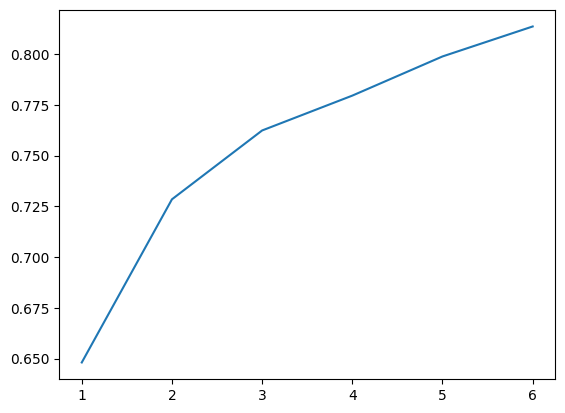

In [86]:
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [87]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)
    break

1/1 [==============================] - 0s 165ms/step


In [88]:
predictions

array([[0.88191545],
       [0.9856099 ],
       [0.6725597 ],
       [0.8279565 ],
       [0.99932647],
       [0.09047218],
       [0.349     ],
       [0.9766738 ],
       [0.6430596 ],
       [0.9998336 ],
       [0.8693483 ],
       [0.9526076 ],
       [0.9302084 ],
       [0.9765636 ],
       [0.04518521],
       [0.9995175 ],
       [0.9999615 ],
       [0.8798501 ],
       [0.35545918],
       [0.8461327 ],
       [0.82435524],
       [0.97311646],
       [0.97801894],
       [0.99926925],
       [0.9682001 ],
       [0.99996823],
       [0.46244374],
       [0.7533103 ],
       [0.99917364],
       [0.9550994 ],
       [0.10399376],
       [0.99196416]], dtype=float32)

## Data Augmentation using dogs_cats.py

In [90]:
from dogs_cats import DogsVsCats

dc = DogsVsCats()

In [91]:

dc.make_dataset_folders('valid',0,2399)
dc.make_dataset_folders('train',2400,11999)
dc.make_dataset_folders('test',12000,12499)

src:dogs-vs-cats-original\train\dog.0.jpg => dst:dogs-vs-cats\valid\dog\dog.0.jpg
src:dogs-vs-cats-original\train\dog.500.jpg => dst:dogs-vs-cats\valid\dog\dog.500.jpg
src:dogs-vs-cats-original\train\dog.1000.jpg => dst:dogs-vs-cats\valid\dog\dog.1000.jpg
src:dogs-vs-cats-original\train\dog.1500.jpg => dst:dogs-vs-cats\valid\dog\dog.1500.jpg
src:dogs-vs-cats-original\train\dog.2000.jpg => dst:dogs-vs-cats\valid\dog\dog.2000.jpg
src:dogs-vs-cats-original\train\cat.0.jpg => dst:dogs-vs-cats\valid\cat\cat.0.jpg
src:dogs-vs-cats-original\train\cat.500.jpg => dst:dogs-vs-cats\valid\cat\cat.500.jpg
src:dogs-vs-cats-original\train\cat.1000.jpg => dst:dogs-vs-cats\valid\cat\cat.1000.jpg
src:dogs-vs-cats-original\train\cat.1500.jpg => dst:dogs-vs-cats\valid\cat\cat.1500.jpg
src:dogs-vs-cats-original\train\cat.2000.jpg => dst:dogs-vs-cats\valid\cat\cat.2000.jpg
src:dogs-vs-cats-original\train\dog.2400.jpg => dst:dogs-vs-cats\train\dog\dog.2400.jpg
src:dogs-vs-cats-original\train\dog.2900.jpg => 

In [92]:
dc.make_dataset()

Found 21198 files belonging to 2 classes.
Found 4798 files belonging to 2 classes.
Found 2998 files belonging to 2 classes.


In [93]:
dc.build_network(augmentation=True)

Model built successfully!!


In [94]:
print(dc.model)

In [95]:
dc.model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 89, 89, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                     

In [96]:
for data_batch, labels_batch in dc.train_dataset.take(1):
    print(f"Data batch shape: {data_batch.shape}")
    print(f"Label batch shape: {labels_batch.shape}")
    print(f'labels: {labels_batch}')


Data batch shape: (32, 180, 180, 3)
Label batch shape: (32,)
labels: [1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [97]:
dc_model = dc.train('model.ramkumar-ippili.dogsvscatsmodel.keras')

Epoch 1/20
663/663 [==============================] - 168s 253ms/step - loss: 0.5914 - accuracy: 0.6743 - val_loss: 0.4904 - val_accuracy: 0.7609
Epoch 2/20
663/663 [==============================] - 204s 308ms/step - loss: 0.4618 - accuracy: 0.7808 - val_loss: 0.4180 - val_accuracy: 0.8076
Epoch 3/20
663/663 [==============================] - 177s 267ms/step - loss: 0.3760 - accuracy: 0.8334 - val_loss: 0.3449 - val_accuracy: 0.8568
Epoch 4/20
663/663 [==============================] - 166s 251ms/step - loss: 0.3135 - accuracy: 0.8667 - val_loss: 0.3814 - val_accuracy: 0.8376
Epoch 5/20
663/663 [==============================] - 163s 246ms/step - loss: 0.2604 - accuracy: 0.8913 - val_loss: 0.2891 - val_accuracy: 0.8770
Epoch 6/20
663/663 [==============================] - 204s 307ms/step - loss: 0.2221 - accuracy: 0.9072 - val_loss: 0.3126 - val_accuracy: 0.8760
Epoch 7/20
663/663 [==============================] - 212s 320ms/step - loss: 0.1785 - accuracy: 0.9258 - val_loss: 0.2604 -

In [98]:
accuracy = dc_model.history['accuracy']
loss = dc_model.history['loss']

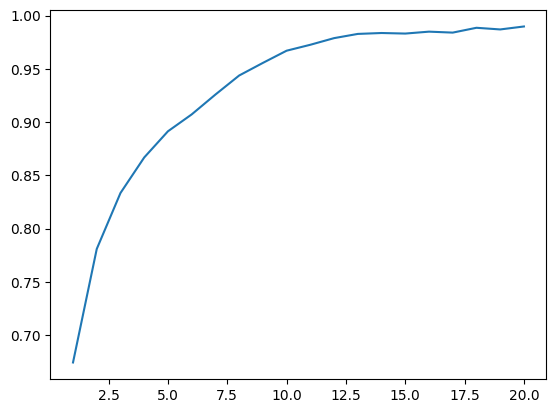

In [99]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(accuracy)+1), accuracy, label='Training Acc')

In [100]:
dc.load_model('model.ramkumar-ippili.dogsvscatsmodel.keras')

dogs-vs-cats\valid\cat\cat.1.jpg
1/1 [==============================] - 0s 62ms/step


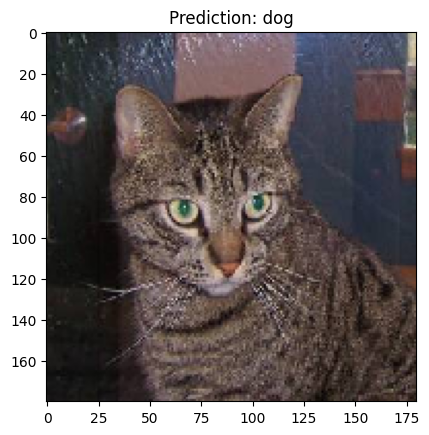

In [101]:
import pathlib
imagePath = pathlib.Path('dogs-vs-cats\\valid\\cat\\cat.1.jpg')
print(imagePath)
predictions = dc.predict(imagePath)

In [102]:
# Count number of dog and cat images
train_dog_count = len(list((dc.BASE_DIR / 'train' / 'dog').glob("*.jpg")))
train_cat_count = len(list((dc.BASE_DIR / 'train' / 'cat').glob("*.jpg")))

print(f"Number of dog images: {train_dog_count}")
print(f"Number of cat images: {train_cat_count}")



Number of dog images: 10599
Number of cat images: 10599


1/1 [==============================] - 0s 21ms/step


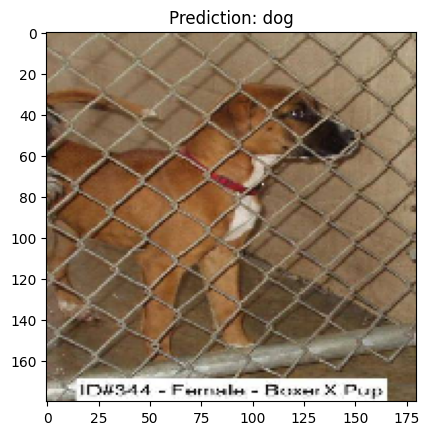

1/1 [==============================] - 0s 20ms/step


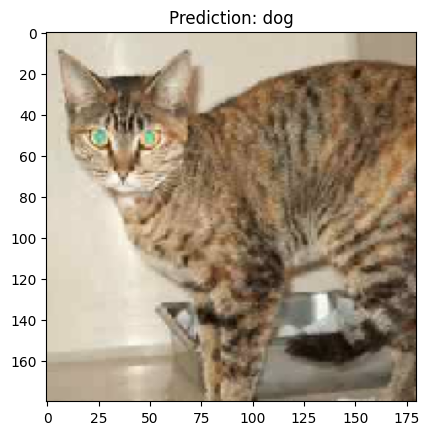

1/1 [==============================] - 0s 30ms/step


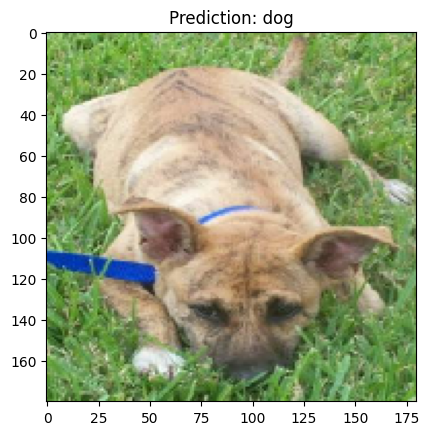

1/1 [==============================] - 0s 25ms/step


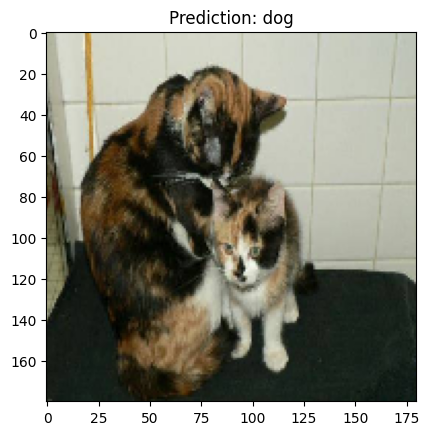

1/1 [==============================] - 0s 27ms/step


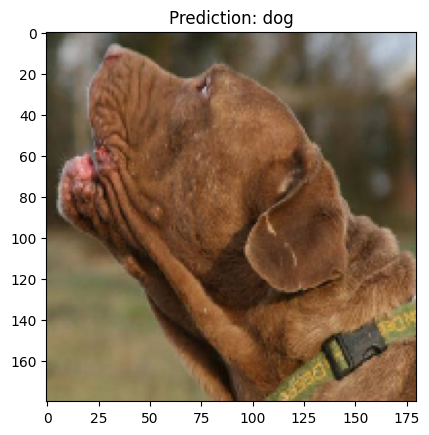

1/1 [==============================] - 0s 19ms/step


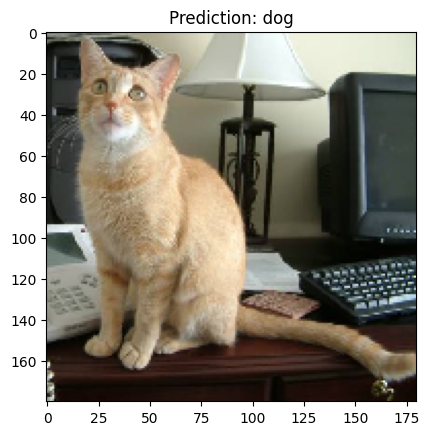

In [103]:
import random
for i in range(3):
    random_integer = random.randint(12000, 12498)
    str1 = 'dogs-vs-cats/test/dog/dog.'+str(random_integer)+'.jpg'
    dc.predict(str1)
    str2 = 'dogs-vs-cats/test/cat/cat.'+str(random_integer)+'.jpg'
    dc.predict(str2)